<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /3_Group_5_Fold.xlsx')
data = data.iloc[:, 1:]
data

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,bad,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,bad,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,bad,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,bad,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,good,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,bad,2


In [3]:
data = data.sort_values(['PatientUID', 'PatientVisitUID'])
data['TimeDiff'] = data.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data['TimeDiff'] = data['TimeDiff'].fillna(0)

In [4]:
data['time_t1'] = pd.to_datetime(data['time_t1'])

In [5]:
columns_to_encode = ['VisitLocation', 'Group']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data[column].unique())}
    data[column] = data[column].map(encoding_map)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52620 entries, 1 to 52619
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   InPatient                     52620 non-null  int64         
 4   OutPatient                    52620 non-null  int64         
 5   Emergency                     52620 non-null  int64         
 6   time_t1                       52620 non-null  datetime64[ns]
 7   eGFR_t1                       52620 non-null  float64       
 8   VisitLocation                 52620 non-null  int64         
 9   StartDTTM                     52620 non-null  datetime64[ns]
 10  EndDttm                       52620 non-null  datetime64[ns]
 11  LabCwhen                    

In [7]:
df = data.copy()

**split train test in each fold**

In [8]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42017, 72)
Test set size: (10603, 72)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 2:
Training set size : (41978, 72)
Test set size: (10642, 72)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 3:
Training set size : (42184, 72)
Test set size: (10436, 72)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 4:
Training set size : (42274, 72)
Test set size: (10346, 72)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 5:
Training set size : (42027, 72)
Test set size: (10593, 72)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---



In [10]:
X_train.columns

Index(['InPatient', 'OutPatient', 'Emergency', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematolo

## **RF**

In [9]:
import warnings

# Filter out specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message="`max_features='auto'` has been deprecated")


### **GridSearch**



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Prepare hyperparameter grid for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 2, 3, 4]
}

# Perform a single grid search
regr = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr, parameters, cv=5)
clf.fit(X_train_scaled, y_train)

# Access the best hyperparameters
best_params = clf.best_params_
print(f"Best hyperparameters: {best_params}")


Best hyperparameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}


### **FeatureSelection**

In [12]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

all_folds = data['Fold'].unique()

rf_feature_importances_list = []

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(max_depth = 4, max_features = 'auto', n_estimators = 300)
    rf_model.fit(X_train_scaled, y_train)

    # Get feature importances
    rf_feature_importances = rf_model.feature_importances_

    # Store feature importances for each fold
    rf_feature_importances_list.append(rf_feature_importances)

# Average feature importances across all folds
rf_average_feature_importances = pd.DataFrame(rf_feature_importances_list).mean()

# Display feature importances
print("RF Average Feature Importances:")
print(rf_average_feature_importances.sort_values(ascending=False))


RF Average Feature Importances:
50    0.857446
59    0.024948
6     0.016333
33    0.016240
52    0.012054
        ...   
26    0.000000
43    0.000000
20    0.000000
46    0.000000
16    0.000000
Length: 72, dtype: float64


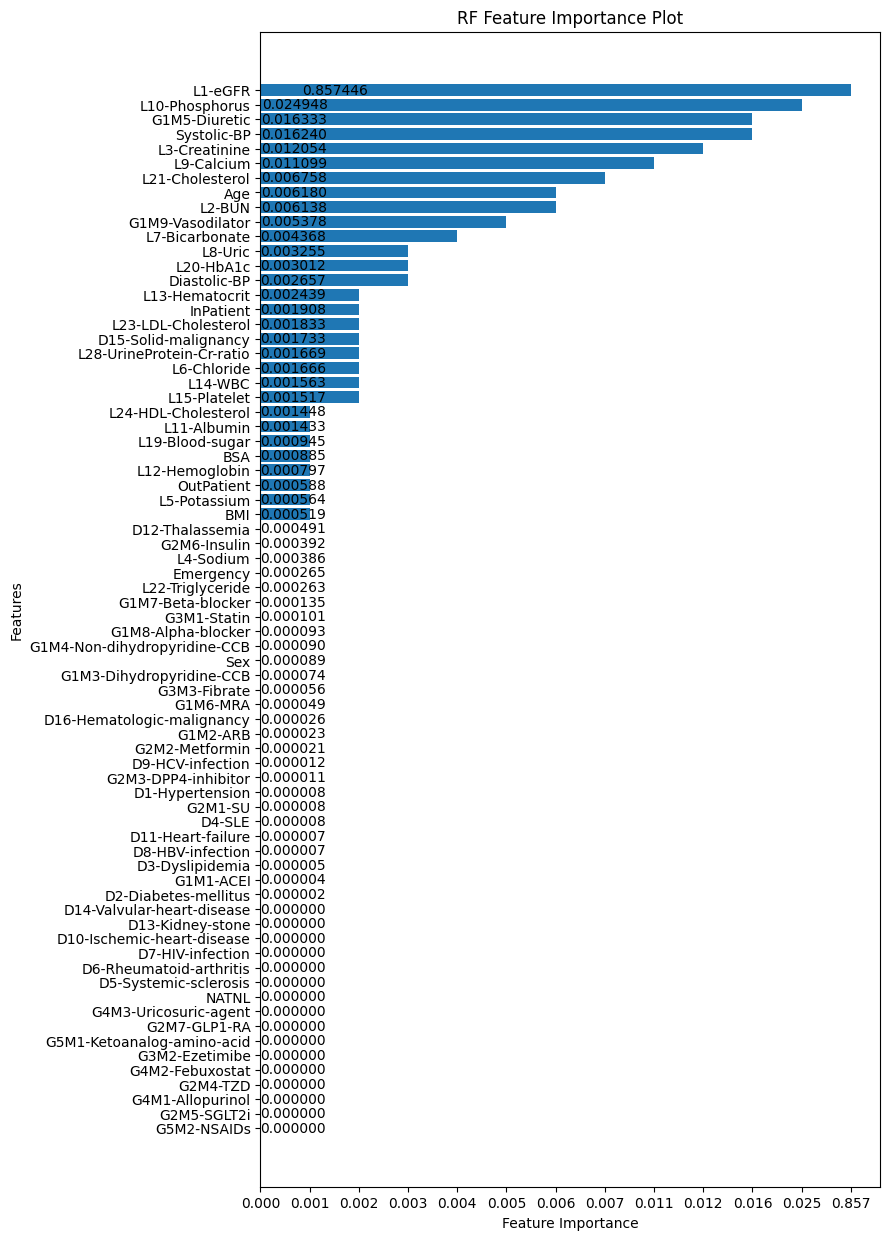

In [13]:
import matplotlib.pyplot as plt
feature_names = X.columns
rf = list(zip(feature_names, rf_average_feature_importances))
rf.sort(key=lambda x: x[1])
# Plotting
plt.figure(figsize=(8, 15))
plt.barh([x[0] for x in rf], ['{:.3f}'.format(x[1]) for x in rf])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RF Feature Importance Plot')

# Annotate the bars with their values
for index, value in enumerate(rf):
    plt.text(value[1], index, f'{value[1]:.6f}', ha='left', va='center')

plt.show()

In [14]:
rf_selected = [(feature_names) for feature_names, rf_average_feature_importances in rf if rf_average_feature_importances > 0.0005]
data[rf_selected]

,BMI,L5-Potassium,OutPatient,L12-Hemoglobin,BSA,L19-Blood-sugar,L11-Albumin,L24-HDL-Cholesterol,L15-Platelet,L14-WBC,...,G1M9-Vasodilator,L2-BUN,Age,L21-Cholesterol,L9-Calcium,L3-Creatinine,Systolic-BP,G1M5-Diuretic,L10-Phosphorus,L1-eGFR
1,20.8000,4.557,1,12.830,1.3900,91.00,4.652,99.00,194.24,4.9248,...,0,18.500,73,215.00,9.643,0.80,127.0,0,3.244,71.70
3,20.2700,4.743,1,13.498,1.3800,86.00,4.729,73.00,251.46,5.1634,...,0,13.000,74,219.00,9.629,0.90,105.0,0,3.787,63.60
2,20.7200,3.800,1,10.100,1.3800,100.00,3.798,65.00,313.00,9.4100,...,0,6.500,75,193.00,8.864,0.82,138.0,0,3.486,70.20
0,20.2700,4.300,1,12.653,1.3600,89.00,4.390,76.00,204.65,4.3718,...,0,13.873,76,205.00,9.248,0.88,134.0,35,3.615,64.02
4,19.0500,4.400,1,10.700,1.3300,88.00,4.194,60.00,434.00,5.4200,...,0,14.500,78,198.00,9.149,1.10,103.0,0,3.816,48.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,29.7500,4.200,1,13.911,1.8800,103.00,5.000,43.00,306.00,10.3200,...,0,20.800,63,165.00,9.800,1.85,134.0,0,3.900,38.17
52616,25.9700,4.400,1,13.220,1.6300,99.00,4.300,42.00,361.00,9.5600,...,0,25.600,71,154.00,9.200,1.85,127.0,0,4.300,27.20
52617,23.8269,4.300,0,11.701,1.6999,123.99,3.100,33.00,131.00,4.6100,...,0,31.400,66,112.00,8.500,1.21,130.0,0,3.400,62.45
52618,22.3761,4.900,1,12.712,1.6172,96.00,4.630,67.35,305.00,9.4400,...,0,22.900,67,202.31,9.599,1.14,137.0,0,3.645,66.18


### **TrainModel**

In [15]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data[rf_selected + ['Fold']]
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

rf_params = {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}

# Lists to store trained models and MAE values
models = []
mae_train_list = []
mae_test_list = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train = data.iloc[train_indices][rf_selected + ['Fold']]
    X_test = data.iloc[test_indices][rf_selected + ['Fold']]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[rf_selected])
    X_test_scaled = scaler.transform(X_test[rf_selected])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=rf_selected)

    # Train a RandomForestRegressor model
    regr_fold = RandomForestRegressor(**rf_params)
    regr_fold.fit(X_train_scaled, y_train)

    models.append(regr_fold)

    # Calculate MAE for each fold and append to lists
    mae_train = mean_absolute_error(y_train, regr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, regr_fold.predict(X_test_scaled))

    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")

# Calculate and print average MAE across all folds
avg_mae_train = sum(mae_train_list) / len(mae_train_list) if len(mae_train_list) > 0 else 0
avg_mae_test = sum(mae_test_list) / len(mae_test_list) if len(mae_test_list) > 0 else 0

print("Average MAE across all folds:")
print(f'Train: {avg_mae_train}')
print(f'Test: {avg_mae_test}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 1:
MAE_train: 6.088271450632133
MAE_test: 5.940912342987537
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 2:
MAE_train: 6.024947714486769
MAE_test: 6.182118990897434
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 3:
MAE_train: 6.027977520170725
MAE_test: 6.1606957436396685
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 4:
MAE_train: 6.037225272571711
MAE_test: 6.123351090211533
---
Fold 5:
MAE_train: 6.06604904077762
MAE_test: 5.994778198437094
---
Average MAE across all folds:
Train: 6.048894199727792
Test: 6.080371273234652


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **LS**

In [20]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42027, 72)
Test set size: (10593, 72)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 2:
Training set size : (41978, 72)
Test set size: (10642, 72)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Fold 3:
Training set size : (42184, 72)
Test set size: (10436, 72)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 4:
Training set size : (42274, 72)
Test set size: (10346, 72)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 5:
Training set size : (42017, 72)
Test set size: (10603, 72)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---



In [22]:
X_train_scaled.columns

Index(['InPatient', 'OutPatient', 'Emergency', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematolo

### **GridSearch**

In [23]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

lasso_pipeline = Pipeline([
    ('lasso', Lasso())
])

params = {
    "lasso__alpha": np.arange(0.01, 0.1, 0.5),
    "lasso__fit_intercept": [True, False],
    "lasso__max_iter": [3000, 4000, 5000],
    "lasso__tol": [1e-4, 1e-3, 1e-2]
}

lasso_cv = GridSearchCV(lasso_pipeline, param_grid=params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

best_params_lasso = lasso_cv.best_params_
print("Best Params {}".format(best_params_lasso))

Best Params {'lasso__alpha': 0.01, 'lasso__fit_intercept': True, 'lasso__max_iter': 3000, 'lasso__tol': 0.01}


### **FeatureSelection**

In [24]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

all_folds = data['Fold'].unique()

lasso_coef_list = []

lasso_params = {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 3000, 'tol': 0.01}

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data for Lasso
    scaler_lasso = StandardScaler()
    X_train_scaled_lasso = scaler_lasso.fit_transform(X_train)
    X_test_scaled_lasso = scaler_lasso.transform(X_test)
    X_train_scaled_lasso = pd.DataFrame(X_train_scaled_lasso, columns=X_train.columns)

    # Train a Lasso model
    lasso_model = Lasso(**lasso_params)
    lasso_model.fit(X_train_scaled_lasso, y_train)

    # Get feature importances for Lasso
    lasso_coef = np.abs(lasso_model.coef_)
    lasso_coef_list.append(lasso_coef)

# Average coefficients across all folds for Lasso
lasso_average_coef = pd.DataFrame(lasso_coef_list).mean()
lasso_coef_sorted = lasso_average_coef.abs().sort_values(ascending=True)
print("LS Average Feature Importances:")
print(lasso_coef_sorted)


LS Average Feature Importances:
25    0.000000
21    0.000194
26    0.002399
40    0.005024
44    0.005976
        ...   
51    0.559240
52    0.567292
33    0.636971
66    0.715203
50    4.282188
Length: 72, dtype: float64


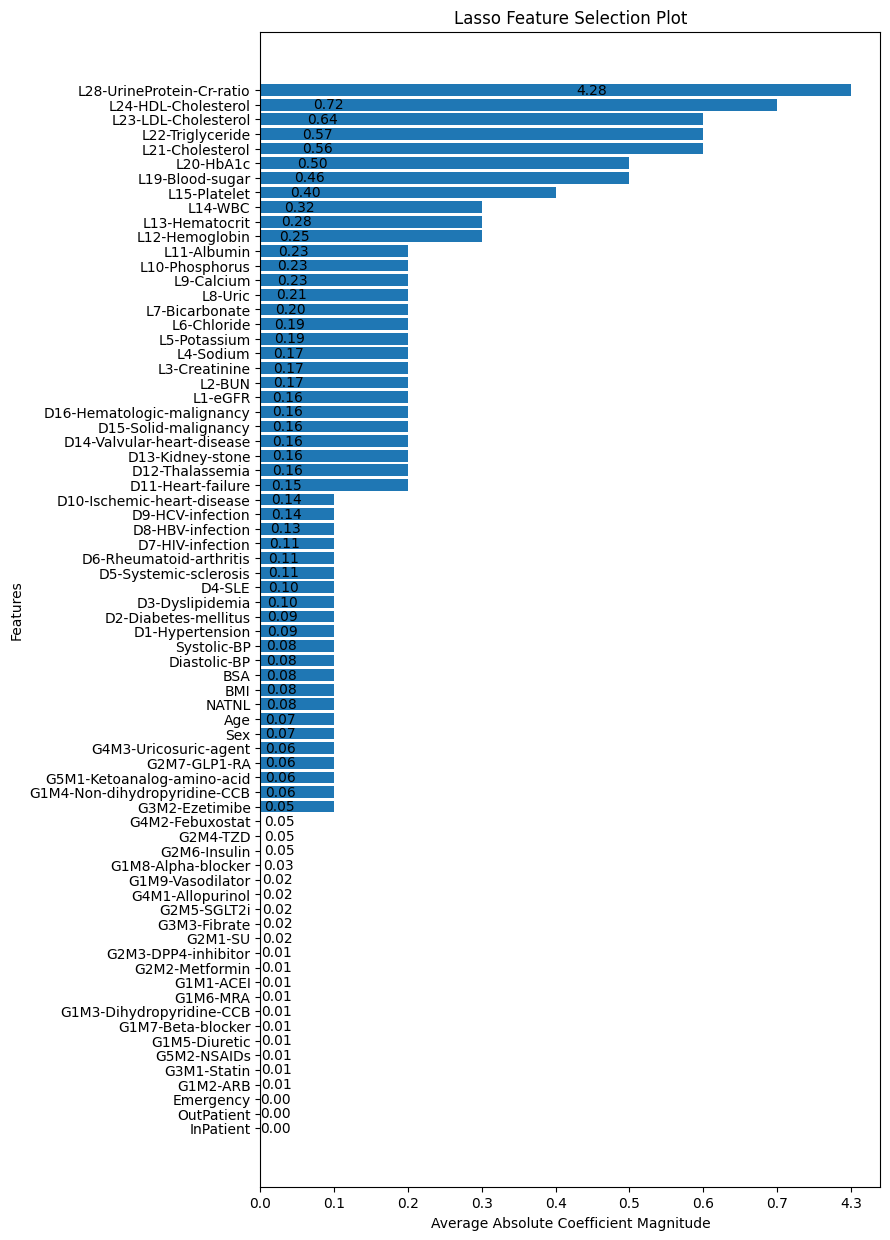

In [25]:
import matplotlib.pyplot as plt

feature_names = X.columns
ls = list(zip(feature_names, lasso_coef_sorted))
ls.sort(key=lambda x: x[1])

# Plotting
plt.figure(figsize=(8, 15))
plt.barh([x[0] for x in ls], ['{:.1f}'.format(x[1]) for x in ls])
plt.xlabel('Average Absolute Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Lasso Feature Selection Plot')

# Annotate the bars with their values
for index, value in enumerate(ls):
    plt.text(value[1], index, f'{value[1]:.2f}', ha='left', va='center')

plt.show()


In [26]:
ls_selected = [feature_names for feature_names, coef in ls if coef >= 0.05]
data[ls_selected]

,G3M2-Ezetimibe,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G2M7-GLP1-RA,G4M3-Uricosuric-agent,Sex,Age,NATNL,BMI,BSA,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
1,0,0,0,0,0,1,73,0,20.8000,1.3900,...,39.367,4.9248,194.24,91.00,5.284,215.00,81.00,123.00,99.00,21.019
3,0,0,0,0,0,1,74,0,20.2700,1.3800,...,41.270,5.1634,251.46,86.00,5.755,219.00,64.00,146.00,73.00,15.198
2,0,0,0,0,0,1,75,0,20.7200,1.3800,...,32.400,9.4100,313.00,100.00,5.300,193.00,62.00,129.00,65.00,30.879
0,0,0,0,0,0,1,76,0,20.2700,1.3600,...,39.053,4.3718,204.65,89.00,5.562,205.00,69.00,139.00,76.00,36.916
4,0,0,0,0,0,1,78,0,19.0500,1.3300,...,34.600,5.4200,434.00,88.00,5.500,198.00,74.00,129.00,60.00,28.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0,0,0,0,0,0,63,0,29.7500,1.8800,...,42.100,10.3200,306.00,103.00,5.900,165.00,311.00,84.00,43.00,131.300
52616,0,0,0,0,0,1,71,0,25.9700,1.6300,...,40.600,9.5600,361.00,99.00,7.100,154.00,196.00,83.00,42.00,325.800
52617,0,0,0,0,0,0,66,0,23.8269,1.6999,...,35.000,4.6100,131.00,123.99,6.457,112.00,96.00,64.00,33.00,104.371
52618,0,0,0,0,0,0,67,0,22.3761,1.6172,...,39.000,9.4400,305.00,96.00,5.715,202.31,93.29,136.63,67.35,27.246


### **TrainModel**

In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming ls_selected contains the selected features
X = data[ls_selected]
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

lasso_params = {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 3000, 'tol': 0.01}

# Lists to store trained models and metrics
models = []
mae_train_list = []
mae_test_list = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a Lasso model
    lsgr_fold = Lasso(**lasso_params)
    lsgr_fold.fit(X_train_scaled, y_train)

    models.append(lsgr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, lsgr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, lsgr_fold.predict(X_test_scaled))

    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")

# Calculate and print average MAE across all folds
avg_mae_train = sum(mae_train_list) / len(mae_train_list)
avg_mae_test = sum(mae_test_list) / len(mae_test_list)

print("Average MAE across all folds:")
print(f'Train: {avg_mae_train}')
print(f'Test: {avg_mae_test}')


Fold 1:
MAE_train: 6.20173921610443
MAE_test: 6.199633450078963
---
Fold 2:
MAE_train: 6.17771152104526
MAE_test: 6.295352090234398
---
Fold 3:
MAE_train: 6.1856864276858055
MAE_test: 6.219768543739339
---
Fold 4:
MAE_train: 6.2307852382960816
MAE_test: 6.0643583524964315
---
Fold 5:
MAE_train: 6.188123274289948
MAE_test: 6.239691430272854
---
Average MAE across all folds:
Train: 6.196809135484306
Test: 6.2037607733643965


# **MLP**

In [28]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42274, 72)
Test set size: (10346, 72)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 2:
Training set size : (42027, 72)
Test set size: (10593, 72)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 3:
Training set size : (42184, 72)
Test set size: (10436, 72)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 4:
Training set size : (41978, 72)
Test set size: (10642, 72)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 5:
Training set size : (42017, 72)
Test set size: (10603, 72)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---



In [29]:
X_train_scaled.columns

Index(['InPatient', 'OutPatient', 'Emergency', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematolo

### **GridSearch**

In [31]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, message="Maximum iterations \(1500\) reached and the optimization hasn't converged yet.")

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

# Create a pipeline with StandardScaler and MLPRegressor
mlp_pipeline = Pipeline([
    ('mlp', MLPRegressor())
])

# Define the parameters for the grid search
parameters_mlp = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (256,)],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlp__max_iter': [1000, 1500, 2000],
    'mlp__tol': [1e-4, 1e-3, 1e-2]
}

# Create a GridSearchCV object
mlp_cv = GridSearchCV(mlp_pipeline, param_grid=parameters_mlp, cv=5)

# Assuming X_train_scaled and y_train are defined
mlp_cv.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_mlp = mlp_cv.best_params_
print("Best Params: {}".format(best_params_mlp))

### **FeatureSelection**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation'], axis=1)
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

all_folds = data['Fold'].unique()

mlp_feature_importances_list = []

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Train a Random Forest model
    mlp_model = MLPRegressor(**best_params_mlp)
    mlp_model.fit(X_train_scaled, y_train)

    # Get feature importances
    mlp_feature_importances = mlp_model.feature_importances_

    # Store feature importances for each fold
    mlp_feature_importances_list.append(mlp_feature_importances)

# Average feature importances across all folds
mlp_average_feature_importances = pd.DataFrame(mlp_feature_importances_list).mean()

# Display feature importances
print("MLP Average Feature Importances:")
print(mlp_average_feature_importances.sort_values(ascending=False))


In [ ]:
import matplotlib.pyplot as plt

feature_names = X.columns
mlp = list(zip(feature_names, mlp_average_feature_importances))
mlp.sort(key=lambda x: x[1])

# Plotting
plt.figure(figsize=(8, 15))
plt.barh([x[0] for x in mlp], ['{:.1f}'.format(x[1]) for x in mlp])
plt.xlabel('Average Feature Importances')
plt.ylabel('Features')
plt.title('MLP Feature Selection Plot')

# Annotate the bars with their values
for index, value in enumerate(mlp):
    plt.text(value[1], index, f'{value[1]:.2f}', ha='left', va='center')

plt.show()


In [ ]:
mlp_selected = [(feature_names) for feature_names, mlp_average_feature_importances in mlp if mlp_average_feature_importances > 0.00001]
data[mlp_selected]

### **TrainModel**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming mlp_selected contains the selected features
X = data[mlp_selected]
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

mlp_params = {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 3000, 'tol': 0.01}

# Lists to store trained models and metrics
models = []
mae_train_list = []
mae_test_list = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a  model
    mlpgr_fold = MLPRegressor(**mlp_params)
    mlpgr_fold.fit(X_train_scaled, y_train)

    models.append(mlpgr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, mlpgr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, mlpgr_fold.predict(X_test_scaled))

    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")

# Calculate and print average MAE across all folds
avg_mae_train = sum(mae_train_list) / len(mae_train_list)
avg_mae_test = sum(mae_test_list) / len(mae_test_list)

print("Average MAE across all folds:")
print(f'Train: {avg_mae_train}')
print(f'Test: {avg_mae_test}')
